In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [2]:
df=pd.read_csv('../input/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**The dataset contains the following features:**
1. age(in years)
2. sex: (1 = male; 0 = female)
3. cp: chest pain type
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: 1 or 0 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


**No. of Rows**

In [5]:
df.shape[0]

303

**No. of columns**

In [6]:
df.shape[1]

14

**Checking null value**

In [7]:
Null=df.isnull()
Null.sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is *no* null value in the dataset

**What is the mean,std of the dataset**

The features described in the below data set are:

1. Count tells us the number of NoN-empty rows in a feature.

2. Mean tells us the mean value of that feature.

3. Std tells us the Standard Deviation Value of that feature.

4. Min tells us the minimum value of that feature.

5. 25%, 50%, and 75% are the percentile/quartile of each features.

6. Max tells us the maximum value of that feature.



In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Checking features of various attributes**

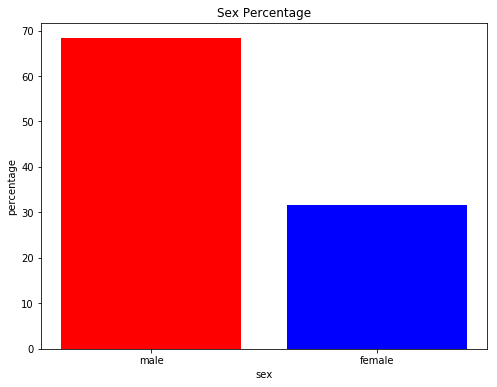

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
male =len(df[df['sex'] == 1])
female = len(df[df['sex']== 0])
total=len(df.sex)
total_male_percent=(male/total)*100
total_female_percent=(female/total)*100

#plot
labels = ['male', 'female']
values = [total_male_percent, total_female_percent]

plt.figure(figsize=(8,6))
plt.title('Sex Percentage')
plt.xlabel('sex')
plt.ylabel('percentage')
plt.bar(labels, values,color=('r','b'))
plt.show()

**Chest pain**

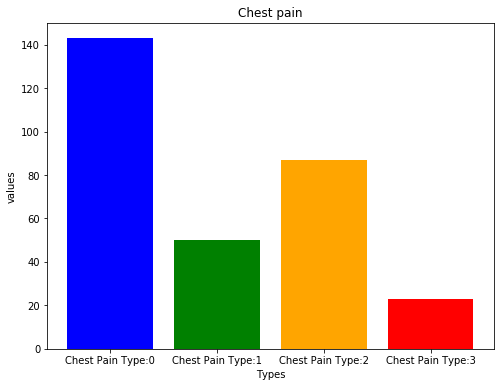

In [10]:
plt.figure(figsize=(8,6))

# Data to plot
labels = 'Chest Pain Type:0','Chest Pain Type:1','Chest Pain Type:2','Chest Pain Type:3'
values = [len(df[df['cp'] == 0]),len(df[df['cp'] == 1]),
         len(df[df['cp'] == 2]),
         len(df[df['cp'] == 3])]
colors = ['blue', 'green','orange','red']
 
# Plot
plt.title('Chest pain')
plt.xlabel('Types')
plt.ylabel('values')

plt.bar(labels,values, color=colors) 
plt.show()

**3. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)**

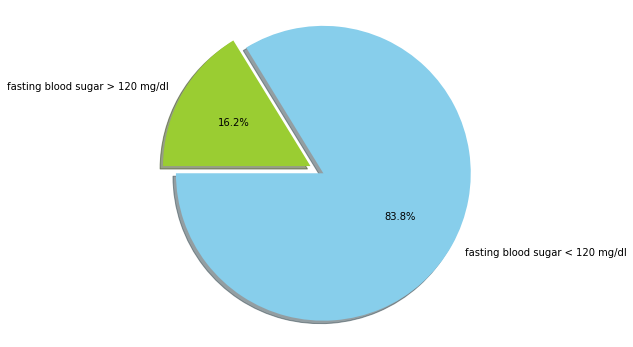

In [11]:
plt.figure(figsize=(8,6))

# Data to plot
labels = 'fasting blood sugar < 120 mg/dl','fasting blood sugar > 120 mg/dl'
sizes = [len(df[df['fbs'] == 0]),len(df[df['cp'] == 1])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

**4.exang: exercise induced angina (1 = yes; 0 = no)**

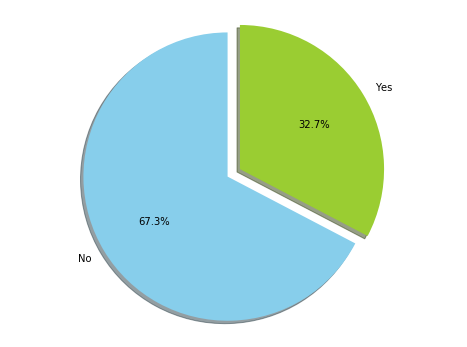

In [12]:
plt.figure(figsize=(8,6))

# Data to plot
labels = 'No','Yes'
sizes = [len(df[df['exang'] == 0]),len(df[df['exang'] == 1])]
colors = ['skyblue', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

** Number of people who have heart disease according to age **

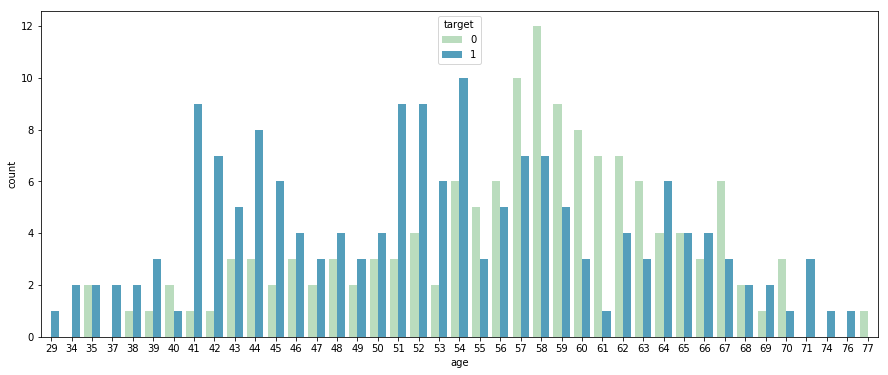

In [13]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'target',palette='GnBu')
plt.show()

**Scatterplot for thalach vs. trestbps **

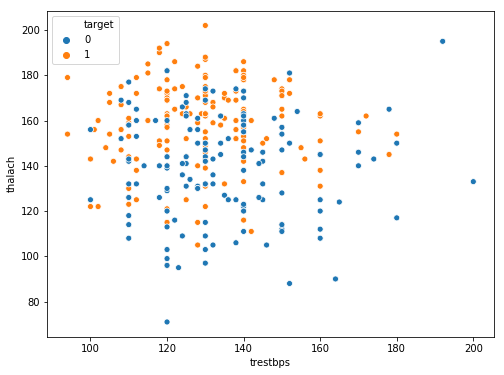

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='trestbps',y='thalach',data=df,hue='target')
plt.show()

**Making Predictions**


**Splitting the dataset into training and test set**

In [15]:
print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [16]:
X= df.drop('target',axis=1)
y=df['target']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


**Xgboost**

In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
dpen = []
for i in range(5,11):
    model = XGBClassifier(max_depth = i)
    model.fit(X_train,y_train)
    target = model.predict(X_test)
    dpen.append(accuracy_score(y_test, target))
    print("accuracy : ",dpen[i-5])
print("Best accuracy: ",max(dpen))

accuracy :  0.8241758241758241
accuracy :  0.8241758241758241
accuracy :  0.8131868131868132
accuracy :  0.8131868131868132
accuracy :  0.8131868131868132
accuracy :  0.8131868131868132
Best accuracy:  0.8241758241758241


**KNN Algorithm **

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)  # n_neighbors means k
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print("{} NN Score: {:.2f}%".format(7, knn.score(X_test, y_test)*100))

7 NN Score: 81.32%


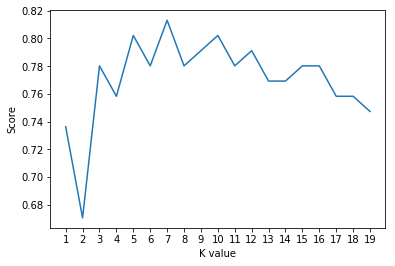

Maximum KNN Score is 81.32%


In [22]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()


print("Maximum KNN Score is {:.2f}%".format((max(scoreList))*100))

**Random Forest**

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf.score(X_test,y_test)*100))

Random Forest Algorithm Accuracy Score : 82.42%


**SVM**

In [24]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(svm.score(X_test,y_test)*100))

Test Accuracy of SVM Algorithm: 84.62%


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


**naive Bayes**

In [25]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Accuracy of Naive Bayes: {:.2f}%".format(nb.score(X_test,y_test)*100))

Accuracy of Naive Bayes: 84.62%
